In [75]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
import re
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [10]:
# The XML file path
file_path = "/Users/lilitpoghosyan/Desktop/s362431a.txt"  

In [11]:
# Reading the XML content from the file
with open(file_path, "r", encoding="utf-8") as file:
    xml_content = file.read().strip()

In [12]:
# Finding all <ep-bulletin> sections 
#every patent section is enclosed within <ep-bulletin> and </ep-bulletin> tags
patent_sections = re.findall(r'(<ep-bulletin.*?</ep-bulletin>)', xml_content, re.DOTALL)

In [13]:
# Optionally, display a sample of the first patent to verify extraction
if patent_sections:
    print("\nSample of the First Patent Section:")
    print(patent_sections[0][:1000])  
    print(f"Total Patents Found in the File: {len(patent_sections)}")


Sample of the First Patent Section:
<ep-bulletin id="EP07829819A1" file="07829819.7" lang="en" country="EP" doc-number="2078696" kind="A1" date-publ="20240731" status="r" dtd-version="ep-bulletin-v1-7"><SDOBI lang="en"><B000><eptags><B001EP>ATBECHDEDKESFRGBGRITLILUNLSEMCPTIESILTLVFIRO..CY..TRBGCZEEHUPLSK....IS..MT..........................</B001EP><B002EP><ep-chg-info><ep-chg idref="ep-chg0001" btag="B237" date="20240627" status="n"/></ep-chg-info></B002EP><B007EP>0009183-ADWI03</B007EP></eptags></B000><B100><B110>2078696</B110><B120><B121>EUROPEAN PATENT APPLICATION</B121><B121EP>published in accordance with Art. 153(4) EPC</B121EP></B120><B130>A1</B130><B140><date>20240731</date></B140><B190>EP</B190></B100><B200><B210>07829819.7</B210><B220><date>20071015</date></B220><B230><B237 id="ep-chg0001"><date>20240301</date></B237></B230><B240><B241><date>20090421</date></B241><B242><date>20160524</date></B242></B240><B250>ja</B250><B251EP>en</B251EP><B260>en</B260></B200><B300><B310>20062

In [49]:
data_list = []
for idx, patent_xml in enumerate(patent_sections):
    try:
        # Parse the XML data
        root = ET.fromstring(patent_xml)

        # Metadata
        patent_id = root.attrib.get("id", "N/A")
        publication_date = root.attrib.get("date-publ", "N/A")
        country = root.attrib.get("country", "N/A")
        doc_number = root.attrib.get("doc-number", "N/A")
        kind = root.attrib.get("kind", "N/A")

        # Application Details
        app_number = root.find(".//B210").text if root.find(".//B210") is not None else "N/A"
        filing_date = root.find(".//B220/date").text if root.find(".//B220/date") is not None else "N/A"

        # Priority Details
        priority_numbers = [pri.text for pri in root.findall(".//B300/B310") if pri.text]
        priority_dates = [pri_date.text for pri_date in root.findall(".//B300/B320/date") if pri_date.text]
        priority_numbers = ", ".join(priority_numbers) if priority_numbers else "N/A"
        priority_dates = ", ".join(priority_dates) if priority_dates else "N/A"

        # Title Information
        title = "N/A"
        b540 = root.find(".//B540")
        if b540 is not None:
            b541_tags = b540.findall("B541")
            b542_tags = b540.findall("B542")
            for i in range(len(b541_tags)):
                if b541_tags[i].text == "en":  # Check if the title is in English
                    if i < len(b542_tags):
                        title = b542_tags[i].text
                    break

        # IPC Codes
        classifications = [elem.text for elem in root.findall(".//classification-ipcr/text") if elem.text]
        classification_codes = ", ".join(classifications) if classifications else "N/A"

        # Applicant Details
        applicant_name = root.find(".//B700/B710/B711/snm")
        applicant_name = applicant_name.text if applicant_name is not None else "N/A"

        applicant_country = root.find(".//B700/B710/B711/adr/ctry")
        applicant_country = applicant_country.text if applicant_country is not None else "N/A"

        
        data_list.append({
            "Patent ID": patent_id,
            "Publication Date": publication_date,
            "Country": country,
            "Document Number": doc_number,
            "Patent Type": kind,
            "Application Number": app_number,
            "Filing Date": filing_date,
            "Priority Numbers": priority_numbers,
            "Priority Dates": priority_dates,
            "Title": title,
            "IPC Codes": classification_codes,
            "Applicant Name": applicant_name,
            "Applicant Country": applicant_country
        })

    except ET.ParseError as e:
        print(f"Error parsing patent {idx + 1}: {e}")


In [52]:
pd.set_option("display.max_colwidth", None)  
pd.set_option("display.max_rows", 50)  
pd.set_option("display.max_columns", None) 

In [53]:
display(df.head(5)) 

,Patent ID,Publication Date,Country,Document Number,Patent Type,Application Number,Filing Date,Priority Numbers,Priority Dates,Title,IPC Codes,Applicant Name,Applicant Country
0,EP07829819A1,20240731,EP,2078696,A1,07829819.7,20071015,"2006295958, 2006337561, 2007011776","20061031, 20061214, 20070122",MESOPOROUS SILICA PARTICLES,"C01B 37/02 20060101AFI20150727BHEP , C01B 33/18 20060101ALI20150727BHEP , B01J 20/28 20060101ALI20150727BHEP , B01J 20/32 20060101ALI20150727BHEP , B01J 21/08 20060101ALI20150727BHEP , B01J 35/02 20060101ALI20150727BHEP , B01J 35/08 20060101ALI20150727BHEP , B01J 35/10 20060101ALI20150727BHEP , B01J 20/10 20060101ALI20150727BHEP",Kao Corporation,JP
1,EP08703391A1,20240731,EP,2105678,A1,08703391.6,20080117,2007008567,20070117,"AIR CONDITIONING BLOW OUT PANEL, AIR CONDITIONING CONTROL SYSTEM PROVIDED WITH THE AIR CONDITIONING BLOW OUT PANEL AND AIR CONDITIONING CONTROL METHOD","F24F 11/30 20180101AFI20230825BHEP , F24F 11/77 20180101ALI20230825BHEP , F24F 11/79 20180101ALI20230825BHEP , F24F 110/00 20180101ALI20230825BHEP , F24F 120/10 20180101ALI20230825BHEP , F24F 11/56 20180101ALI20230825BHEP , F24F 11/54 20180101ALI20230825BHEP , F24F 1/0047 20190101ALI20230825BHEP , F24F 11/74 20180101ALI20230825BHEP","Daikin Industries, Ltd.",JP
2,EP08792993A2,20240731,EP,2185762,A2,08792993.1,20080801,20070078141,20070803,CLOTHES TREATING APPARATUS,"D06F 58/10 20060101AFI20240126BHEP , D06F 58/20 20060101ALN20240126BHEP",LG Electronics Inc.,KR
3,EP09705463A1,20240731,EP,2244759,A1,09705463.9,20090128,6711 P,20080128,A FILTER CLEANING DEVICE,A61M 1/00 20060101AFI20161103BHEP,Implantica Patent Ltd.,SE
4,EP10250320A2,20240731,EP,2221151,A2,10250320.8,20100224,391780,20090224,Autonomous robotic assembly system comprising a plurality of mobile robotic machines and a wireless communication system,"B25J 9/00 20060101AFI20240627BHEP , B64F 5/00 20060101ALI20240627BHEP , B64F 5/10 20170101ALI20240627BHEP",The Boeing Company,US


In [64]:
# Converting filing date format
df["Filing Date"] = pd.to_datetime(df["Filing Date"], format="%Y%m%d", errors="coerce")
print(df[["Filing Date"]].head())

0   2007-10-15
1   2008-01-17
2   2008-08-01
3   2009-01-28
4   2010-02-24
Name: Filing Date, dtype: datetime64[ns]
  Filing Date
0  2007-10-15
1  2008-01-17
2  2008-08-01
3  2009-01-28
4  2010-02-24


In [65]:
# Extracting the year from the Filing Date column
df["Filing Year"] = df["Filing Date"].dt.year
print(df[["Filing Date", "Filing Year"]].head())


  Filing Date  Filing Year
0  2007-10-15         2007
1  2008-01-17         2008
2  2008-08-01         2008
3  2009-01-28         2009
4  2010-02-24         2010


In [66]:
missing_dates = df["Filing Date"].isnull().sum()

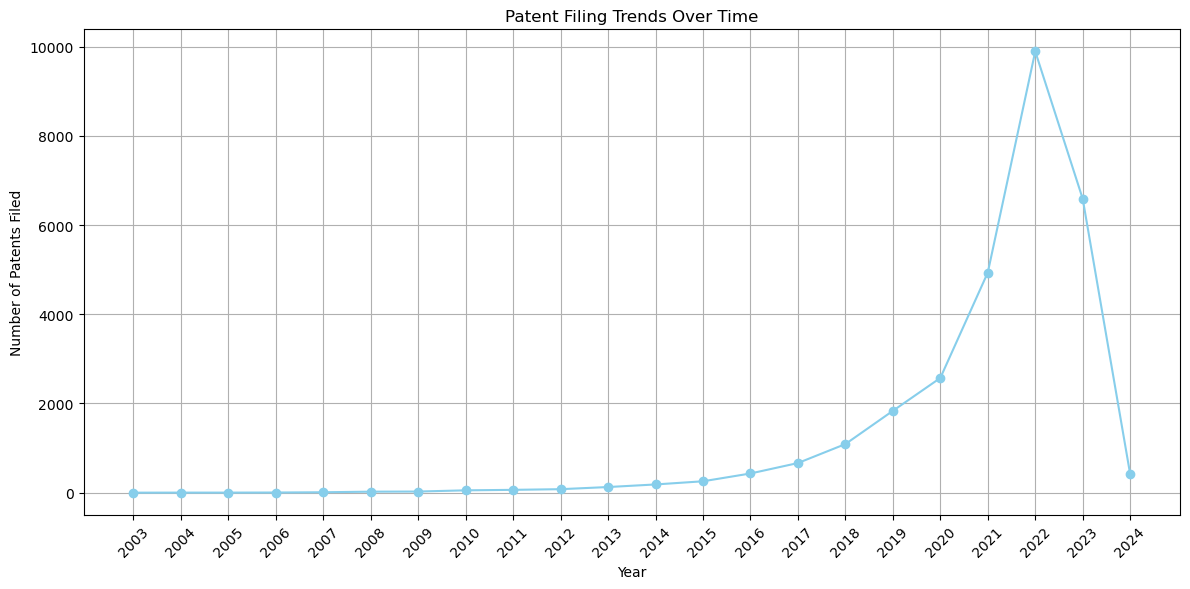

In [71]:
filing_trends = df["Filing Year"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(filing_trends.index, filing_trends.values, marker="o", linestyle="-", color="skyblue")
plt.xlabel("Year")
plt.ylabel("Number of Patents Filed")
plt.title("Patent Filing Trends Over Time")
plt.grid(True)
min_year = filing_trends.index.min()
max_year = filing_trends.index.max()
all_years = np.arange(min_year, max_year + 1, 1) 
plt.xticks(all_years, rotation=45)  
plt.tight_layout()
plt.show()


In [87]:
# IPC Codes N/A = "The designation of the inventor has not yet been filed"
pattern = r'\b[A-Z]\d{2}[A-Z]?\s+\d{1,3}/\d{2}\b'
df['Extracted IPC Codes'] = df['IPC Codes'].apply(lambda x: ', '.join(re.findall(pattern, str(x))) if pd.notna(x) else 'N/A')
df['Extracted IPC Codes'] = df['Extracted IPC Codes'].replace('', 'N/A')
cleaned_na_count = (df['Extracted IPC Codes'] == 'N/A').sum()
print(f"Cleaned 'N/A' count in 'Extracted IPC Codes': {cleaned_na_count}")

Cleaned 'N/A' count in 'Extracted IPC Codes': 1652


In [88]:
all_extracted_codes = [code.strip() for row in df['Extracted IPC Codes'].str.split(', ').dropna() for code in row]
code_counts = Counter(all_extracted_codes)
code_df = pd.DataFrame(code_counts.most_common(), columns=['IPC Code', 'Frequency'])
print(code_df)

          IPC Code  Frequency
0              N/A       1652
1      A61P  35/00        540
2      H04L   5/00        358
3      A61B   5/00        351
4      H04W  72/04        283
...            ...        ...
20630  A24C   5/35          1
20631  B21J  15/14          1
20632  A01G   9/26          1
20633  C08L  99/00          1
20634  G06F  16/26          1

[20635 rows x 2 columns]


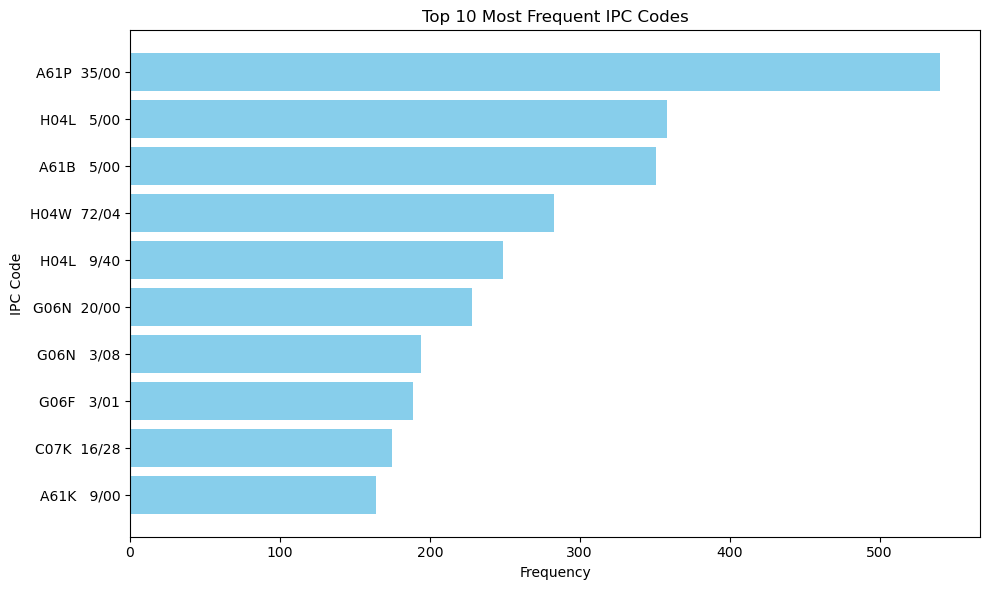

In [90]:
# Exclude 'N/A' values from the extracted IPC codes
valid_ipc_codes = df[df['Extracted IPC Codes'] != 'N/A']
all_extracted_codes = [code.strip() for row in valid_ipc_codes['Extracted IPC Codes'].str.split(', ').dropna() for code in row]
code_counts = Counter(all_extracted_codes)
code_df = pd.DataFrame(code_counts.most_common(), columns=['IPC Code', 'Frequency'])
#'Top 10 Most Frequent IPC Codes (Single file)
plt.figure(figsize=(10, 6))
plt.barh(code_df['IPC Code'][:10], code_df['Frequency'][:10], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('IPC Code')
plt.title('Top 10 Most Frequent IPC Codes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

All_xml

In [31]:
import pandas as pd

# Load the combined patent data from the CSV file
df = pd.read_csv("all_combined_patent_data.csv")

# Convert Filing Date and Publication Date to datetime format
df["Filing Date"] = pd.to_datetime(df["Filing Date"], format="%Y%m%d", errors="coerce")
df["Publication Date"] = pd.to_datetime(df["Publication Date"], format="%Y%m%d", errors="coerce")

# Extract the year from the Filing Date and Publication Date columns
df["Filing Year"] = df["Filing Date"].dt.year
df["Publication Year"] = df["Publication Date"].dt.year

# Display the first few rows to verify the conversion
print(df[["Filing Date", "Filing Year", "Publication Date", "Publication Year"]].head())


/var/folders/_j/b71xnqt97kz04hzw79l603_80000gn/T/ipykernel_5130/1113417313.py:4: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("all_combined_patent_data.csv")


  Filing Date  Filing Year Publication Date  Publication Year
0  2005-12-16         2005       2025-02-05              2025
1  2007-10-10         2007       2025-02-05              2025
2  2007-10-18         2007       2025-02-05              2025
3  2008-12-19         2008       2025-02-05              2025
4  2009-03-12         2009       2025-02-05              2025


In [32]:
# Check for missing or invalid dates
print(f"Missing or Invalid Filing Dates: {df['Filing Date'].isnull().sum()}")
print(f"Missing or Invalid Publication Dates: {df['Publication Date'].isnull().sum()}")

# Display rows with invalid or missing dates
print(df[df["Filing Date"].isnull()][["Filing Date", "Filing Year"]].head())
print(df[df["Publication Date"].isnull()][["Publication Date", "Publication Year"]].head())


Missing or Invalid Filing Dates: 0
Missing or Invalid Publication Dates: 0
Empty DataFrame
Columns: [Filing Date, Filing Year]
Index: []
Empty DataFrame
Columns: [Publication Date, Publication Year]
Index: []


In [33]:
# Display unique years in Filing and Publication Dates
print("Unique Filing Years:", df["Filing Year"].unique())
print("Unique Publication Years:", df["Publication Year"].unique())

# Check if all years are within a reasonable range (e.g., 1900 to 2025)
invalid_filing_years = df[(df["Filing Year"] < 1900) | (df["Filing Year"] > 2025)]
invalid_publication_years = df[(df["Publication Year"] < 1900) | (df["Publication Year"] > 2025)]

print(f"Invalid Filing Years: {invalid_filing_years['Filing Year'].unique()}")
print(f"Invalid Publication Years: {invalid_publication_years['Publication Year'].unique()}")

# Display problematic rows
print("Rows with Invalid Filing Years:")
print(invalid_filing_years[["Filing Date", "Filing Year"]].head())

print("Rows with Invalid Publication Years:")
print(invalid_publication_years[["Publication Date", "Publication Year"]].head())


Unique Filing Years: [2005 2007 2008 2009 2010 2011 2012 2013 2014 2006 2015 2016 2017 2018
 2019 2020 2021 2022 2023 2004 2024 2003 2000 2002 2001 1992 1999 1995
 1989 1997 1998 1986 1979 1987 1984 1993 1988]
Unique Publication Years: [2025 2024]
Invalid Filing Years: []
Invalid Publication Years: []
Rows with Invalid Filing Years:
Empty DataFrame
Columns: [Filing Date, Filing Year]
Index: []
Rows with Invalid Publication Years:
Empty DataFrame
Columns: [Publication Date, Publication Year]
Index: []


In [34]:
# Summary statistics of Filing and Publication Years
print("Filing Year Range:", df["Filing Year"].min(), "to", df["Filing Year"].max())
print("Publication Year Range:", df["Publication Year"].min(), "to", df["Publication Year"].max())


Filing Year Range: 1979 to 2024
Publication Year Range: 2024 to 2025


In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the number of patents filed per year
filing_trends = df["Filing Year"].value_counts().sort_index()

# Display the first few data points to verify
print(filing_trends.head())


Filing Year
1979    1
1984    1
1986    4
1987    1
1988    1
Name: count, dtype: int64


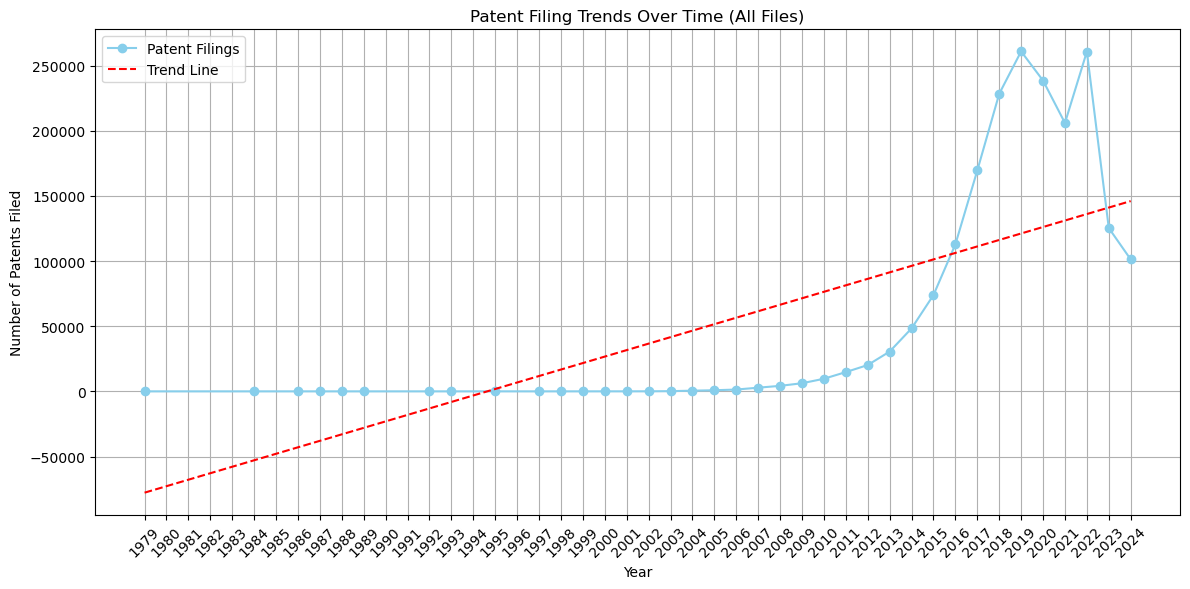

In [36]:
plt.figure(figsize=(12, 6))

# Plotting the patent filing trends over time
plt.plot(filing_trends.index, filing_trends.values, marker="o", linestyle="-", color="skyblue", label="Patent Filings")

# Generate a linear trend line
z = np.polyfit(filing_trends.index, filing_trends.values, 1)  # 1st degree polynomial (linear trend line)
p = np.poly1d(z)

# Plot the trend line
plt.plot(filing_trends.index, p(filing_trends.index), "r--", label="Trend Line")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Number of Patents Filed")
plt.title("Patent Filing Trends Over Time (All Files)")
plt.grid(True)

# Make x-axis more detailed by showing every year
min_year = filing_trends.index.min()
max_year = filing_trends.index.max()
plt.xticks(np.arange(min_year, max_year + 1, 1), rotation=45)

# Add a legend
plt.legend()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/_j/b71xnqt97kz04hzw79l603_80000gn/T/ipykernel_5130/1959126446.py:6: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("all_combined_patent_data.csv")


Top 20 Most Common IPC Codes:
                                                  IPC Code  Count
153598   H04L   5/00        20060101AFI20240823BHEP    ...    273
41413    A61P  35/00        20060101ALI20230505BHEP    ...    256
848916   H04L   5/00        20060101ALI20240823BHEP    ...    246
15733    A61P  35/00        20060101ALI20240823BHEP    ...    192
551736   A61P  35/00        20060101ALI20230504BHEP    ...    170
522429   A61P  35/00        20060101ALI20230407BHEP    ...    168
1217184  A61P  35/00        20060101ALI20241227BHEP    ...    168
118993   A61P  35/00        20060101ALI20230512BHEP    ...    164
966035   H04B   7/06        20060101AFI20240823BHEP    ...    161
997027   H04W  36/00        20090101AFI20240823BHEP    ...    160
480883   A61P  35/00        20060101ALI20230503BHEP    ...    149
581685   A61P  35/00        20060101ALI20230630BHEP    ...    146
618180   A61P  35/00        20060101ALI20230331BHEP    ...    146
801194   A61P  35/00        20060101ALI2023080

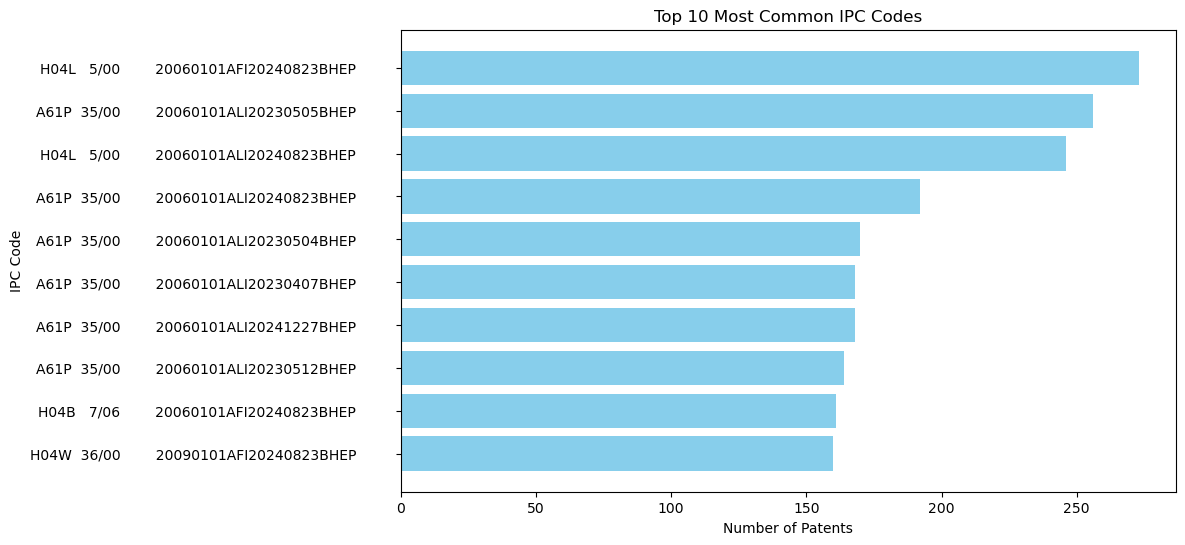

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# ✅ Load the extracted patent data
df = pd.read_csv("all_combined_patent_data.csv")

# ✅ Check if 'IPC Codes' column exists
if "IPC Codes" in df.columns:
    # 🔹 Flatten all IPC codes into a single list
    ipc_codes = df["IPC Codes"].dropna().str.split(", ").explode()

    # 🔹 Count occurrences of each IPC code
    ipc_counts = Counter(ipc_codes)

    # 🔹 Convert to DataFrame for easy visualization
    ipc_df = pd.DataFrame(ipc_counts.items(), columns=["IPC Code", "Count"])

    # 🔹 Sort by most frequent IPC codes
    ipc_df = ipc_df.sort_values(by="Count", ascending=False)

    # ✅ Display top IPC codes
    print("Top 20 Most Common IPC Codes:")
    print(ipc_df.head(20))

    # ✅ Plot the Top 10 IPC Codes
    top_n = 10
    top_ipc_df = ipc_df.head(top_n)

    # 🔹 Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(top_ipc_df["IPC Code"], top_ipc_df["Count"], color="skyblue")
    plt.xlabel("Number of Patents")
    plt.ylabel("IPC Code")
    plt.title(f"Top {top_n} Most Common IPC Codes")
    plt.gca().invert_yaxis()  # Flip y-axis for better readability
    plt.show()

else:
    print("❌ 'IPC Codes' column not found in the dataset.")
